Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras

from xgboost import XGBClassifier
import lightgbm as lgbm
from lightgbm import LGBMClassifier

In [ ]:
!pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Loading the data and analysis

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


In [ ]:
df_train.shape

(8693, 14)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Missing values in the datasets

In [ ]:
pd.isnull(df_train).sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Figure size 720x432 with 0 Axes>

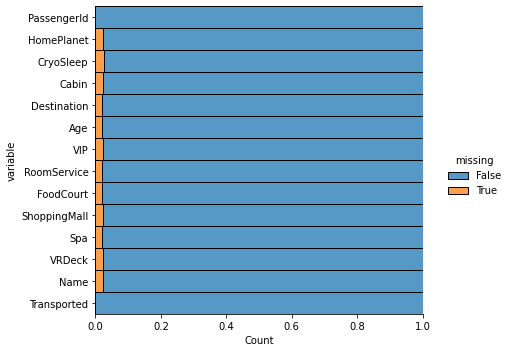

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(data=df_train.isna().melt(value_name="missing"),y="variable",hue="missing",multiple="fill",aspect=1.25)

In [ ]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez


In [ ]:
df_test.shape

(4277, 13)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
pd.isnull(df_test).sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [ ]:
df_train.Age=df_train.Age.fillna(df_train.Age.mean())
df_train.VIP=df_train.VIP.fillna(df_train.VIP.median())
df_train.RoomService=df_train.RoomService.fillna(df_train.RoomService.mean())
df_train.FoodCourt=df_train.FoodCourt.fillna(df_train.FoodCourt.mean())
df_train.ShoppingMall=df_train.ShoppingMall.fillna(df_train.ShoppingMall.mean())
df_train.Spa=df_train.Spa.fillna(df_train.Spa.mean())
df_train.VRDeck=df_train.VRDeck.fillna(df_train.VRDeck.median())
df_train.HomePlanet=df_train.HomePlanet.fillna(df_train.HomePlanet.mode()[0])
df_train.Cabin=df_train.Cabin.fillna(df_train.Cabin.mode()[0])
df_train.Destination=df_train.Destination.fillna(df_train.Destination.mode()[0])
df_train.CryoSleep=df_train.CryoSleep.fillna(df_train.CryoSleep.median())

In [ ]:
df_train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [ ]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

<Figure size 720x432 with 0 Axes>

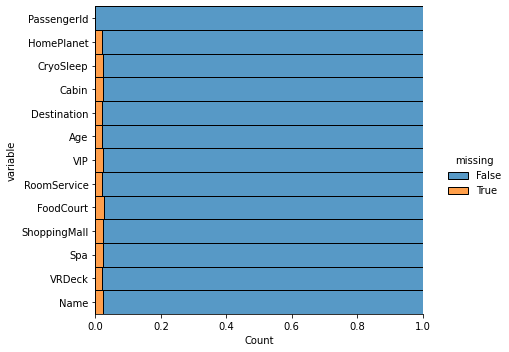

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(data=df_test.isna().melt(value_name="missing"),y="variable",hue="missing",multiple="fill",aspect=1.25)

In [ ]:
df_test.Age=df_test.Age.fillna(df_test.Age.mean())
df_test.VIP=df_test.VIP.fillna(df_test.VIP.median())
df_test.RoomService=df_test.RoomService.fillna(df_test.RoomService.mean())
df_test.FoodCourt=df_test.FoodCourt.fillna(df_test.FoodCourt.mean())
df_test.ShoppingMall=df_test.ShoppingMall.fillna(df_test.ShoppingMall.mean())
df_test.Spa=df_test.Spa.fillna(df_test.Spa.mean())
df_test.VRDeck=df_test.VRDeck.fillna(df_test.VRDeck.median())
df_test.Cabin=df_test.Cabin.fillna(df_test.Cabin.mode()[0])
df_test.Destination=df_test.Destination.fillna(df_test.Destination.mode()[0])
df_test.HomePlanet=df_test.HomePlanet.fillna(df_test.HomePlanet.mode()[0])
df_test.CryoSleep=df_test.CryoSleep.fillna(df_test.CryoSleep.median())

In [ ]:
df_test.isna().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

In [ ]:
df_train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [ ]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


Data Preprocessing

In [ ]:
df_train['CryoSleep'] = df_train['CryoSleep'].astype(int)
df_train['VIP'] = df_train['VIP'].astype(int)
df_train['Transported'] = df_train['Transported'].astype(int)

In [ ]:
df_test['CryoSleep'] = df_test['CryoSleep'].astype(int)
df_test['VIP'] = df_test['VIP'].astype(int)

In [ ]:
df_train.drop(columns=['PassengerId','Name','Cabin'],axis=1,inplace=True)

In [ ]:
df_test.drop(columns=['PassengerId','Name','Cabin'],axis=1,inplace=True)

In [ ]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,TRAPPIST-1e,39.00,0,0.00,0.00,0.00,0.00,0.00,0
1,Earth,0,TRAPPIST-1e,24.00,0,109.00,9.00,25.00,549.00,44.00,1
2,Europa,0,TRAPPIST-1e,58.00,1,43.00,3576.00,0.00,6715.00,49.00,0
3,Europa,0,TRAPPIST-1e,33.00,0,0.00,1283.00,371.00,3329.00,193.00,0
4,Earth,0,TRAPPIST-1e,16.00,0,303.00,70.00,151.00,565.00,2.00,1


In [ ]:
df_train['HomePlanet'].value_counts()

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
df_train['Destination'].value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [ ]:
df_train['HomePlanet'].replace(to_replace=['Earth', 'Europa', 'Mars'], value=[1, 2, 3], inplace=True)

In [ ]:
df_train['Destination'].replace(to_replace=['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22'], value=[1, 2, 3], inplace=True)

In [ ]:
df_test['HomePlanet'].replace(to_replace=['Earth', 'Europa', 'Mars'], value=[1, 2, 3], inplace=True)

In [ ]:
df_test['Destination'].replace(to_replace=['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22'], value=[1, 2, 3], inplace=True)

In [ ]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,2,0,1,39.00,0,0.00,0.00,0.00,0.00,0.00,0
1,1,0,1,24.00,0,109.00,9.00,25.00,549.00,44.00,1
2,2,0,1,58.00,1,43.00,3576.00,0.00,6715.00,49.00,0
3,2,0,1,33.00,0,0.00,1283.00,371.00,3329.00,193.00,0
4,1,0,1,16.00,0,303.00,70.00,151.00,565.00,2.00,1


In [ ]:
df_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,1,27.00,0,0.00,0.00,0.00,0.00,0.00
1,1,0,1,19.00,0,0.00,9.00,0.00,2823.00,0.00
2,2,1,2,31.00,0,0.00,0.00,0.00,0.00,0.00
3,2,0,1,38.00,0,0.00,6652.00,0.00,181.00,585.00
4,1,0,1,20.00,0,10.00,0.00,635.00,0.00,0.00


Data Visualisation

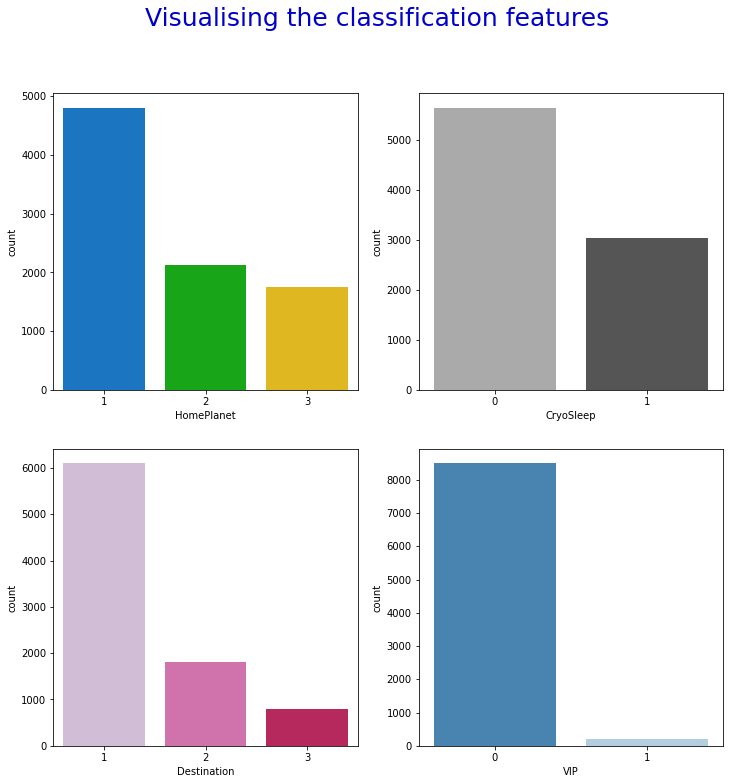

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (12, 12))
plt.suptitle('Visualising the classification features',color='mediumblue',fontsize=25)
sns.countplot(x=df_train['HomePlanet'],ax=ax[0,0],palette='nipy_spectral')
sns.countplot(x=df_train['CryoSleep'],ax=ax[0,1],palette='gist_yarg')
sns.countplot(x=df_train['Destination'],ax=ax[1,0],palette='PuRd')
sns.countplot(x=df_train['VIP'],ax=ax[1,1],palette='Blues_r')


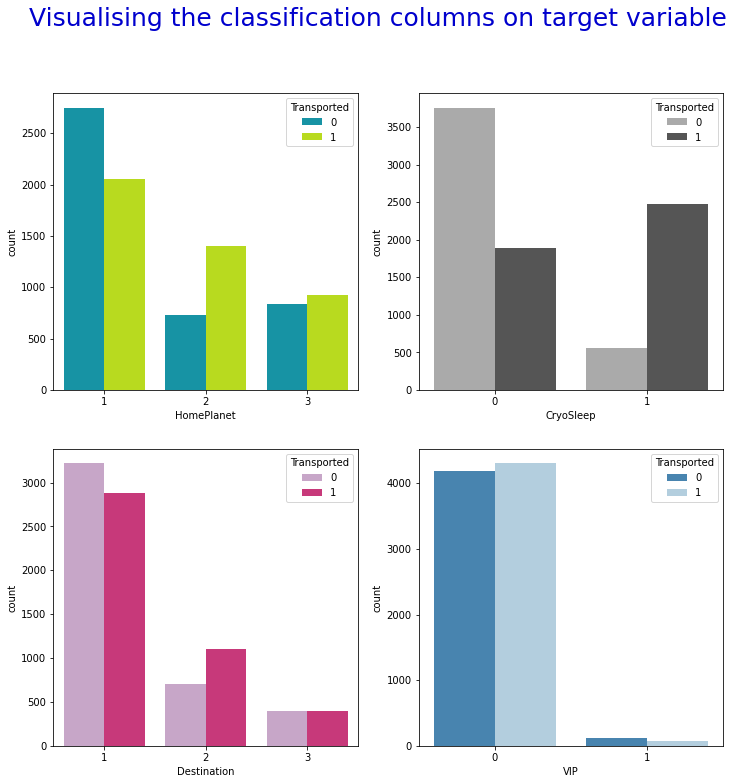

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (12, 12))
plt.suptitle('Visualising the classification columns on target variable',color='mediumblue',fontsize=25)
sns.countplot(x=df_train['HomePlanet'],ax=ax[0,0],palette='nipy_spectral',hue=df_train['Transported'])
sns.countplot(x=df_train['CryoSleep'],ax=ax[0,1],palette='gist_yarg',hue=df_train['Transported'])
sns.countplot(x=df_train['Destination'],ax=ax[1,0],palette='PuRd',hue=df_train['Transported'])
sns.countplot(x=df_train['VIP'],ax=ax[1,1],palette='Blues_r',hue=df_train['Transported'])


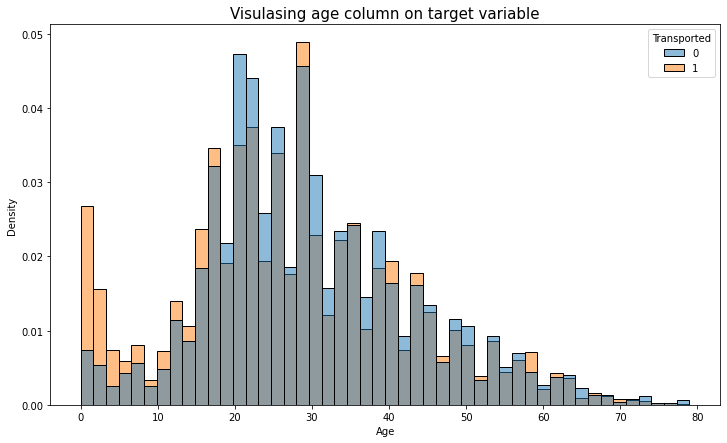

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(df_train, x="Age", hue="Transported",stat = 'density',common_norm=False)
plt.title('Visulasing age column on target variable', fontsize=15)
plt.show()

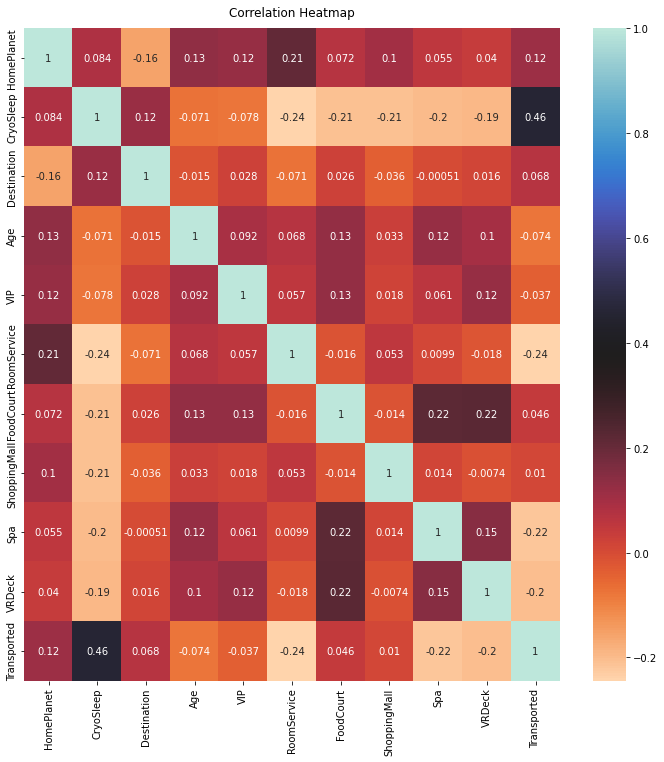

In [ ]:
plt.figure(figsize=(12,12))
heatmap = sns.heatmap(df_train.corr(),annot=True,cmap="icefire_r");
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Outliers Checking

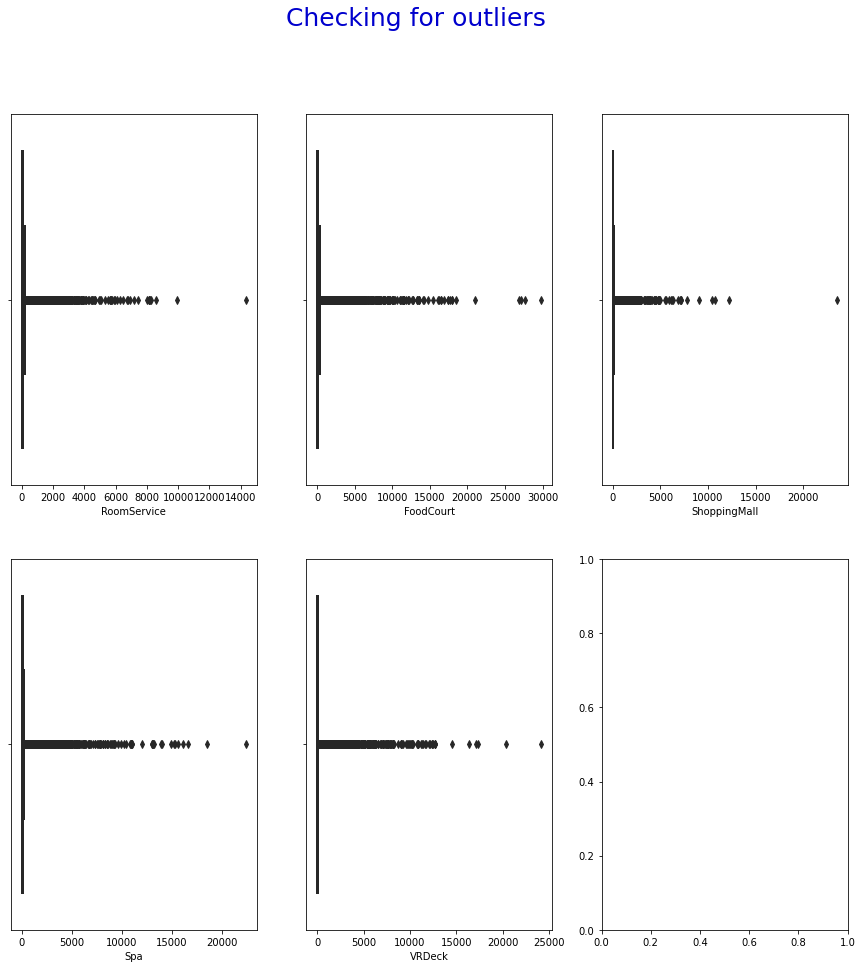

In [ ]:
num_df = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
fig, ax = plt.subplots(2, 3, figsize = (15, 15))
plt.suptitle('Checking for outliers', fontsize = 25, color = 'mediumblue')
i=0
j=0
for x in num_df:
    sns.boxplot(x = df_train[x], ax= ax[j,i%3], color= 'indigo', linewidth= 2)
    i = i+1
    if i==3:
        j=1
plt.show()

In [ ]:
#df_train[df_train['ShoppingMall'] > 10000].count()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
4724,2,0,1,26.0,0,0.0,21.0,10424.0,1373.0,7218.0,0
6223,2,0,1,13.0,0,0.0,100.0,12253.0,6.0,80.0,1
7425,2,0,1,41.0,0,0.0,116.0,10705.0,9181.0,10.0,0
8415,2,0,1,17.0,0,0.0,366.0,23492.0,356.0,3.0,1


In [ ]:
df_train = df_train.drop(df_train[df_train['ShoppingMall'] > 10000].index)

In [ ]:
#df_train[df_train['VRDeck'] > 12000].count()

In [ ]:
df_train = df_train.drop(df_train[df_train['VRDeck'] > 12000].index)

In [ ]:
df_train = df_train.drop(df_train[df_train['FoodCourt'] > 16000].index)

In [ ]:
df_train = df_train.drop(df_train[df_train['RoomService'] > 7000].index)

In [ ]:
df_train = df_train.drop(df_train[df_train['Spa'] > 15000].index)

In [ ]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,2,0,1,39.00,0,0.00,0.00,0.00,0.00,0.00,0
1,1,0,1,24.00,0,109.00,9.00,25.00,549.00,44.00,1
2,2,0,1,58.00,1,43.00,3576.00,0.00,6715.00,49.00,0
3,2,0,1,33.00,0,0.00,1283.00,371.00,3329.00,193.00,0
4,1,0,1,16.00,0,303.00,70.00,151.00,565.00,2.00,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,2,0,2,41.00,1,0.00,6819.00,0.00,1643.00,74.00,0
8689,1,1,3,18.00,0,0.00,0.00,0.00,0.00,0.00,0
8690,1,0,1,26.00,0,0.00,0.00,1872.00,1.00,0.00,1
8691,2,0,2,32.00,0,0.00,1049.00,0.00,353.00,3235.00,0


Data Standardization

In [ ]:
scaler = StandardScaler()
df_train[num_df]=scaler.fit_transform(df_train[num_df])
df_test[num_df] = scaler.transform(df_test[num_df])

In [ ]:
y = df_train['Transported']
df_train.drop(columns=['Transported'],inplace=True)

In [ ]:
x = df_train
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10,test_size=0.25)

In [ ]:
print('The original data shape is {}. Test data shape {} and train data shape is {}'.format(x.shape,x_test.shape,x_train.shape))

The original data shape is (8641, 10). Test data shape (2161, 10) and train data shape is (6480, 10)


In [ ]:
clf = LazyClassifier(verbose = 0,
                     ignore_warnings = True,
                     custom_metric = None,
                     predictions = False,
                     random_state = 12,
                     classifiers = 'all')

models, predictions = clf.fit(x_train, x_test ,y_train , y_test)

100%|██████████| 29/29 [00:15<00:00,  1.91it/s]


Choosing classification models

In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.80,0.80,0.80,0.80,0.45
LGBMClassifier,0.80,0.80,0.80,0.80,0.24
RandomForestClassifier,0.79,0.79,0.79,0.79,1.23
AdaBoostClassifier,0.78,0.78,0.78,0.78,0.30
SVC,0.78,0.78,0.78,0.78,1.86
Perceptron,0.78,0.78,0.78,0.78,0.03
ExtraTreesClassifier,0.78,0.78,0.78,0.78,0.65
LogisticRegression,0.78,0.78,0.78,0.78,0.04
NuSVC,0.78,0.78,0.78,0.78,2.97


In [ ]:
df_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,1,27.00,0,-0.37,-0.31,-0.33,-0.29,-0.28
1,1,0,1,19.00,0,-0.37,-0.31,-0.33,2.51,-0.28
2,2,1,2,31.00,0,-0.37,-0.31,-0.33,-0.29,-0.28
3,2,0,1,38.00,0,-0.37,4.73,-0.33,-0.11,0.33
4,1,0,1,20.00,0,-0.35,-0.31,0.93,-0.29,-0.28
...,...,...,...,...,...,...,...,...,...,...
4272,1,1,1,34.00,0,-0.37,-0.31,-0.33,-0.29,-0.28
4273,1,0,1,42.00,0,-0.37,0.33,-0.30,-0.28,-0.13
4274,3,1,2,28.66,0,-0.37,-0.31,-0.33,-0.29,-0.28
4275,2,0,1,28.66,0,-0.37,1.72,-0.33,-0.29,0.27


In [ ]:
df_test1 = pd.read_csv('test.csv')

In [ ]:
df_test1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.00,False,0.00,0.00,0.00,0.00,0.00,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.00,False,0.00,847.00,17.00,10.00,144.00,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.00,0.00,0.00,0.00,0.00,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.00,2680.00,0.00,0.00,523.00,Kitakan Conale


In [ ]:
data = df_test1[['PassengerId']].copy()

In [ ]:
model = XGBClassifier()

In [ ]:

model.fit(x_train,y_train)

XGBClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_pred,y_test)

0.7982415548357242

In [ ]:
data_pred = model.predict(df_test)
data['Transported'] = data_pred

In [ ]:
data.replace({1: True, 0: False }, inplace = True)

In [ ]:
data

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
data['Transported'].value_counts()

True     2342
False    1935
Name: Transported, dtype: int64

In [ ]:
data =data.set_index('PassengerId')

In [ ]:
data.to_csv('predicted data.csv')

In [ ]:
model_lgbm = LGBMClassifier()

In [ ]:
model_lgbm.fit(x_train,y_train)

LGBMClassifier()

In [ ]:
y_predl = model_lgbm.predict(x_test)

In [ ]:
accuracy_score(y_predl,y_test)

0.7936140675613143

In [ ]:
lgbm_pred = model_lgbm.predict(df_test)

In [ ]:
data_lgbm = df_test1[['PassengerId']].copy()
data_lgbm['Transported'] = lgbm_pred
data_lgbm.replace({1:True,0:False},inplace=True)
data_lgbm.Transported.value_counts()

True     2282
False    1995
Name: Transported, dtype: int64

In [ ]:
data_lgbm =data_lgbm.set_index('PassengerId')

In [ ]:
data_lgbm.to_csv('predicted data with lgbm classifier.csv')

Implementing ANN

In [ ]:
model_ann = keras.Sequential([
    keras.layers.Dense(42,input_shape = (10,),activation = 'relu'),
    keras.layers.Dense(21,activation='relu'),
     keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])
model_ann.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model_ann.fit(x_train,y_train,epochs=100)

Epoch 1/100
203/203 [==============================] - 2s 2ms/step - loss: 0.6061 - accuracy: 0.6657
Epoch 2/100
203/203 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7821
Epoch 3/100
203/203 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.7770
Epoch 4/100
203/203 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7818
Epoch 5/100
203/203 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7844
Epoch 6/100
203/203 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.7881
Epoch 7/100
203/203 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.7844
Epoch 8/100
203/203 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7840
Epoch 9/100
203/203 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7858
Epoch 10/100
203/203 [==============================] - 0s 2ms/step - loss: 0.4633 - accura

In [ ]:
ann_predict = model_ann.predict(x_test)

68/68 [==============================] - 1s 3ms/step


In [ ]:
ann_predict

array([[0.37344298],
       [0.89419806],
       [0.0424625 ],
       ...,
       [0.06361765],
       [0.9809144 ],
       [0.3655146 ]], dtype=float32)

In [ ]:
y_pred = []
for k in ann_predict:
    if k >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred

[0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,


In [ ]:
accuracy_score(y_test,y_pred)

0.7959278111985192

In [ ]:
sub_ann_pred = model.predict(df_test)
sub_ann1_pred = []
for ele in sub_ann_pred:
    if ele >0.5:
        sub_ann1_pred.append(1)
    else:
        sub_ann1_pred.append(0)

In [ ]:
sub_ann_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
kann = df_test1[['PassengerId']].copy()
kann['Transported'] = sub_ann1_pred
kann.replace({1:True,0:False},inplace=True)

In [ ]:
kann

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
kann['Transported'].value_counts()

True     2342
False    1935
Name: Transported, dtype: int64

In [ ]:
kann =kann.set_index('PassengerId')

In [ ]:
kann

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [ ]:
kann.to_csv('predicted data with ann.csv')